# Ready, Steady, Go AI (*Tutorial*)

This tutorial is a supplement to the paper, **Ready, Steady, Go AI: A Practical Tutorial on Explainable Artificial Intelligence and Its Applications in Plant Digital Phenomics** (submitted to *Patterns, 2021*) by Farid Nakhle and Antoine Harfouche

Read the accompanying paper [here](https://doi.org).

# Table of contents


* **1. Background**
* **2. Downloading Annotated Images**
* **3. Training YOLOv3**
* **4. Downloading The Split Dataset**
* **5. Cropping Images**

# 1. Background


**Why do we need to crop?**

Datasets will sometimes include images that depict more than one object, typically belonging to background objects that are not of interest for an AI algorithm to learn. This could negatively affect its training and can be solved by cropping images, keeping only important parts of it. However, this process can take a considerable amount of time and effort. We show how cropping can be automated using the you only look once (YOLO) algorithm

**What is YOLOv3?**

YOLO is an algorithm that devides an input image into an S × S grid and, for every object in the image, the grid cell associated with the center of it is responsible for its detection. This is done by having the cell predict a number of bounding boxes to surround the object. 

As cropping helps classification algorithms concentrate on the regions of interest within images, we exploit the object detection and localization feature of YOLOv3 to automatically detect, localize, and crop the leaves in images.

1000 images, selected randomly from our 10 tomato were manually annotated by drawing bounding boxes around the leaves using the MakeSense annotation tool (https://makesense.ai).

We will leverage the annotated images here to train YOLOv3.

Then, we will use the output model to crop the rest of the images.


# 2. Downloading Annotated Images


As a reminder, we are working with the PlantVillage dataset, originally obtained from [here](http://dx.doi.org/10.17632/tywbtsjrjv.1).
For this tutorial, we will be working with a subset of PlantVillage, where we will choose the tomato classes only. We have made the subset available [here](http://dx.doi.org/10.17632/4g7k9wptyd.1). 

The next code will automatically download 1000 images, specifically annotated to train YOLO.

**It is important to note that Colab deletes all unsaved data once the instance is recycled. Therefore, remember to download your results once you run the code.**

In [ ]:
import requests
import os
import zipfile

## FEEL FREE TO CHANGE THESE PARAMETERS
dataset_url = "http://faridnakhle.com/pv/tomato-YOLOv3-annotations.zip"
save_data_to = "/content/dataset/YOLO_Training"
dataset_file_name = "YOLO.zip"
#######################################

if not os.path.exists(save_data_to):
    os.makedirs(save_data_to)

r = requests.get(dataset_url, stream = True, headers={"User-Agent": "Ready, Steady, Go AI"})

print("Downloading dataset...")  

with open(save_data_to + dataset_file_name, "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block)

## Extract downloaded zip dataset file
print("Dataset downloaded")  
print("Extracting files...")  
with zipfile.ZipFile(save_data_to + dataset_file_name, 'r') as zip_dataset:
    zip_dataset.extractall(save_data_to)

## Delete the zip file as we no longer need it
os.remove(save_data_to + dataset_file_name)
print("All done!")  


Dataset downloaded
Extracting files...
All done!


# 3. Training YOLOv3

Our code will be based on the YOLOv3 implementation of Ultralytics LLC, open source and freely available for redistribution under the [GPL-3.0 license](https://choosealicense.com/licenses/gpl-3.0/). 
For more information please visit https://github.com/ultralytics/yolov3.

In [ ]:
## CLONE THEIR REPO and install all pre-requisites
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
%pip install -qr requirements.txt 

Cloning into 'yolov3'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 9772 (delta 1), reused 19 (delta 0), pack-reused 9727
Receiving objects: 100% (9772/9772), 8.58 MiB | 31.28 MiB/s, done.
Resolving deltas: 100% (6633/6633), done.
/content/yolov3
     |████████████████████████████████| 645kB 15.3MB/s 


Next, we will import Torch Software Framework. It is recommended to use a GPU instance for faster training. By default, this notebook runs on GPU. If you would like to change the instance type, check Colab docs [here](https://colab.research.google.com/notebooks/gpu.ipynb).

In [ ]:
import torch
from IPython.display import Image

print('Importing Torch software framework is complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


Importing Torch software framework is complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


**NB: To make running this notebook faster and our results easily reproducable, we made our trained model available and we will load it after this section. Thus, you might skip this next code block**

In [ ]:
print("Starting Training")
!python train.py --img 224 --batch 16 --epochs 300 --data /content/dataset/YOLO_Training/RSG_Tomato.yaml --weights yolov3.pt --nosave --cache
print("Training Done")

The best generated model is now saved /content/yolov3/runs/expX/weights/best.pt
where X in expX represents the experiment number (how many times the code was run).

**In the next section, we will load our trained model to make our results reproducable. You can change the loading path to use your own instead**

In [ ]:
##########################
### DOWNLOAD THE MODEL ###
##########################

## FEEL FREE TO CHANGE THESE PARAMETERS
model_URL = "http://faridnakhle.com/pv/models/YOLOv3.zip"
save_data_to = "/content/models/"
model_file_name = "yolo.zip"
#######################################

if not os.path.exists(save_data_to):
    os.makedirs(save_data_to)

print("Downloading model...")  

r = requests.get(model_URL, stream = True, headers={"User-Agent": "Ready, Steady, Go AI"})
with open(save_data_to + model_file_name, "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block)

## Extract downloaded zip dataset file
print("Model downloaded")  
print("Extracting files...")

with zipfile.ZipFile(save_data_to + model_file_name, 'r') as zip_dataset:
    zip_dataset.extractall(save_data_to)
print("All done!")  


Model downloaded
Extracting files...
All done!


# 4. Downloading The Split Dataset

In [ ]:
import requests
import os
import zipfile

## FEEL FREE TO CHANGE THESE PARAMETERS
dataset_url = "http://faridnakhle.com/pv/tomato-split-80-10-10.zip"
save_data_to = "/content/dataset/tomato-split/"
dataset_file_name = "tomato-split.zip"
#######################################

if not os.path.exists(save_data_to):
    os.makedirs(save_data_to)

r = requests.get(dataset_url, stream = True, headers={"User-Agent": "Ready, Steady, Go AI"})

print("Downloading dataset...")  

with open(save_data_to + dataset_file_name, "wb") as file: 
    for block in r.iter_content(chunk_size = 1024):
         if block: 
             file.write(block)

## Extract downloaded zip dataset file
print("Dataset downloaded")  
print("Extracting files...")  
with zipfile.ZipFile(save_data_to + dataset_file_name, 'r') as zip_dataset:
    zip_dataset.extractall(save_data_to)

## Delete the zip file as we no longer need it
os.remove(save_data_to + dataset_file_name)
print("All done!")  

Dataset downloaded
Extracting files...
All done!


# 5. Cropping Images

Next, we are going to implement a custom code that locates the bounding box generated by YOLO, and crop the image accordingly.

In [ ]:
import os
import cv2
import random
import numpy as np

# function for cropping each detection and saving as new image
def crop_objects(img, data, path):
    boxes, scores, classes, num_objects = data
    #create dictionary to hold count of objects for image name
    for i in range(len(num_objects)):
        # get count of class for part of image name
        class_index = int(classes[i])
        # get box coords
        xmin, ymin, xmax, ymax = boxes[i]
        # crop detection from image
        cropped_img = img[int(ymin)-5:int(ymax)+5, int(xmin)-5:int(xmax)+5]
        # construct image name and join it to path for saving crop properly
        img_name =  'cropped_img.png'
        img_path = os.path.join(path, img_name )
        # save image
        cv2.imwrite(img_path, cropped_img)

def crop_object(img, coords, img_path):
    # get box coords
    xmin = int(coords[0])
    ymin = int(coords[1])
    xmax = int(coords[2])
    ymax = int(coords[3])
    # crop detection from image
    cropped_img = img[ymin:ymax, xmin:xmax]
    # save image
    cv2.imwrite(img_path, cropped_img)

Now that we have our cropping function, we will write 3 more functions to: (i) plot the grid on the image; (ii) plot the image borders; and (iii) plot the map overlay on the image.

In [ ]:
def plot_grid(img, line_color=(0, 255, 0), thickness=1, type_=cv2.LINE_AA, pxstep=20, pystep=20):
    x = pystep
    y = pxstep

    while x < img.shape[1]:
        cv2.line(img, (x, 0), (x, img.shape[0]), color=line_color, lineType=type_, thickness=thickness)
        x += pystep

    while y < img.shape[0]:
        cv2.line(img, (0, y), (img.shape[1], y), color=line_color, lineType=type_, thickness=thickness)
        y += pxstep

In [ ]:
def plot_borders(img, line_color=(0, 255, 0), thickness=1):
    cv2.rectangle(img,(0 ,0),(img.shape[1]-thickness,img.shape[0]-thickness), line_color, thickness)

In [ ]:
def myround(x, base=5):
    return base * round(x/base)
def plot_overlay(x, img, color, alpha,
 pxstep=20, pystep=20):
    overlay = img.copy()
    x0, x1, x2, x3 = int(x[0]), int(x[1]), int(x[2]), int(x[3])

    x0 = myround(x0,pystep)
    x1 = myround(x1,pxstep)
    x2 = myround(x2,pystep)
    x3 = myround(x3,pxstep)

    c1, c2 = (x0, x1), (x2, x3)
    cv2.rectangle(overlay, c1, c2, color, -1)
    # apply the overlay
    cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)

Next, we will write a custom detection function that uses Ultralytics code to crop all of our dataset.

In [ ]:
!cd /content/yolov3/
import argparse
import time
from pathlib import Path

import cv2
import torch
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, non_max_suppression, apply_classifier, scale_coords, xyxy2xywh, \
    strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized

import glob

In [ ]:
def detect(dataset_dir = '/content/dataset/tomato-split/', model_path='/content/yolov3/runs/train/exp/best.pt'):
    
    save_txt, imgsz = False, 224
    weights = model_path
    projectP = 'runs/detect'
    projectNameP = 'exp'
    save_img = True
    view_img = True

    save_dir = Path(increment_path(Path(projectP) / projectNameP, False))  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    #loop over train, val, and test set
    trainTestVarDirs = glob.glob(dataset_dir + "*")
    for setDir in trainTestVarDirs:
      splitDir = os.path.basename(setDir)
      setClasses = glob.glob(setDir + "/*")
      for setClass in setClasses:
        # Directories
        classDir = os.path.basename(setClass)
        finalSaveDir = os.path.join(save_dir, splitDir, classDir)
        Path(finalSaveDir).mkdir(parents=True, exist_ok=True)
        source = setClass
        

        # Initialize
        set_logging()
        device = select_device('0')
        half = device.type != 'cpu'  # half precision only supported on CUDA

        # Load model
        model = attempt_load(weights, map_location=device)  # load FP32 model
        imgsz = check_img_size(imgsz, s=model.stride.max())  # check img_size
        
        #introducing grid size
        gs = model.stride.max()
        #end

        if half:
            model.half()  # to FP16

        # Second-stage classifier
        classify = False
        if classify:
            modelc = load_classifier(name='resnet101', n=2)  # initialize
            modelc.load_state_dict(torch.load('weights/resnet101.pt', map_location=device)['model']).to(device).eval()

        # Set Dataloader
        vid_path, vid_writer = None, None
        
        dataset = LoadImages(source, img_size=imgsz)

        # Get names and colors
        names = model.module.names if hasattr(model, 'module') else model.names
        colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]

        colors = [[217, 175, 78]]

        # Run inference
        t0 = time.time()
        img = torch.zeros((1, 3, imgsz, imgsz), device=device)  # init img
        _ = model(img.half() if half else img) if device.type != 'cpu' else None  # run once
        for path, img, im0s, vid_cap in dataset:
            img = torch.from_numpy(img).to(device)
            img = img.half() if half else img.float()  # uint8 to fp16/32
            img /= 255.0  # 0 - 255 to 0.0 - 1.0
            if img.ndimension() == 3:
                img = img.unsqueeze(0)

            # Inference
            t1 = time_synchronized()
            pred = model(img, augment=True)[0]

            # Apply NMS
            final_pred = non_max_suppression(pred, 0.15, 0.3, classes=0, agnostic=True)
            pred = non_max_suppression(pred, 0.00005, 1, classes=0, agnostic=True)
            t2 = time_synchronized()

            # Apply Classifier
            if classify:
                pred = apply_classifier(pred, modelc, img, im0s)

            # Process detections
            for i, det in enumerate(pred):  # detections per image
                
                p, s, im0 = Path(path), '', im0s.copy()

                imoriginal = im0.copy()
                #plot grid
                numofsquares = int(imgsz/int(gs))
                rowstep = int(im0.shape[0]/numofsquares)
                colstep = int(im0.shape[1]/numofsquares)
                plot_borders(im0, line_color=(0,0,0), thickness=2)
                gridim_solo = im0.copy()
                plot_grid(gridim_solo, pxstep=rowstep, pystep=colstep, line_color=(0,0,0), thickness=2)
                #end plot grid
     
                save_path = str(finalSaveDir + "/" + p.name)
                s += '%gx%g ' % img.shape[2:]  # print string
                gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
                if len(det):
                    # Rescale boxes from img_size to im0 size
                    det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                    # Print results
                    for c in det[:, -1].unique():
                        n = (det[:, -1] == c).sum()  # detections per class
                        s += '%g %ss, ' % (n, names[int(c)])  # add to string
                    
                    # Write results
                    for *xyxy, conf, cls in reversed(det):
                        if save_img or view_img:  # Add bbox to image
                            label = ''#'%s %.2f' % (names[int(cls)], conf)
                            plot_one_box(xyxy, im0, label=label, color=colors[int(cls)], line_thickness=1)
                            
                

                # Print time (inference + NMS)
                print('%sDone. (%.3fs)' % (s, t2 - t1))

                # Save results (image with detections)
                if save_img:
                    cv2.imwrite(save_path + "_original.jpg", imoriginal)
                    cv2.imwrite(save_path, im0)
                    cv2.imwrite(save_path + "_grid.jpg", gridim_solo)
                        


            # SAVE FINAL CROPPED IMAGES
            # Process detections
            for i, det in enumerate(final_pred):  # detections per image
                
                p, s, im0 = Path(path), '', im0s
                im2 = im0.copy() #to use with grid/map
                #background
                numofsquares = int(imgsz/int(gs))
                rowstep = int(im0.shape[0]/numofsquares)
                colstep = int(im0.shape[1]/numofsquares)
                plot_overlay([0,0, im2.shape[1], im2.shape[0]], im2, color=(255, 255, 255), alpha=0.7, pxstep=rowstep, pystep=colstep)
                
                #borders
                plot_borders(im2, line_color=(0,0,0), thickness=2)
                plot_borders(im0, line_color=(0,0,0), thickness=2)

                save_path = str(finalSaveDir + "/" +  p.name)
                s += '%gx%g ' % img.shape[2:]  # print string
                gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
                if len(det):
                    # Rescale boxes from img_size to im0 size
                    det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                    # Print results
                    for c in det[:, -1].unique():
                        n = (det[:, -1] == c).sum()  # detections per class
                        s += '%g %ss, ' % (n, names[int(c)])  # add to string

                    #FUNCTION custom crop
                    CROP = True
                    if CROP:
                        fidx = 0
                        for *xyxy, conf, cls in reversed(det):
                            if save_img or view_img:
                                fidx = fidx + 1
                                crop_object(im0, xyxy, str(finalSaveDir + "/" +  (p.stem + "_cropped_" + str(fidx) + p.suffix)))
                    #END
                    
                    # Write results
                    for *xyxy, conf, cls in reversed(det):
                        if save_img or view_img:  # Add bbox to image
                            label = ''#'%s %.2f' % (names[int(cls)], conf)
                            plot_one_box(xyxy, im0, label=label, color=colors[int(cls)], line_thickness=2)
                            plot_overlay(xyxy, im2, color=colors[int(cls)], alpha=0.7, pxstep=rowstep, pystep=colstep)
                else:
                    cv2.imwrite(save_path + "_not_cropped.jpg", im0)


                gridim = im2.copy()
                plot_grid(gridim, pxstep=rowstep, pystep=colstep, line_color=(0,0,0), thickness=2)
                
                # Print time (inference + NMS)
                print('%sDone. (%.3fs)' % (s, t2 - t1))

                # Save results (image with detections)
                if save_img:
                    cv2.imwrite(save_path + "_map.jpg", gridim)
                    cv2.imwrite(save_path + "_final.jpg", im0)

        if save_txt or save_img:
            s = f"\n{len(list(finalSaveDir.glob('labels/*.txt')))} labels saved to {finalSaveDir + '/' + 'labels'}" if save_txt else ''
            print(f"Results saved to {finalSaveDir}{s}")

        print('Done. (%.3fs)' % (time.time() - t0))



In [ ]:
detect(model_path='/content/models/weights/RSGAI_YOLOv3.pt')

Now that all images are cropped, we can take a look at a preview

Original Image:


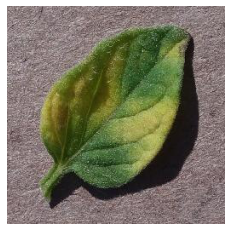

Grid:


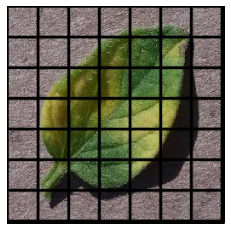

Bounding Boxes:


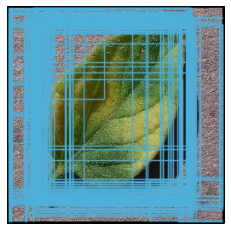

Probability Map:


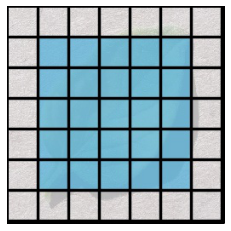

Final Detection:


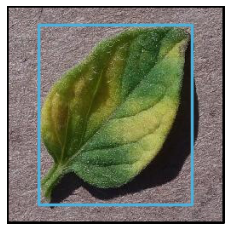

Cropped Image:


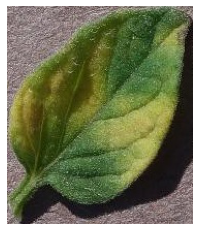

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgPath = '/content/yolov3/runs/detect/exp/train/Tomato___Leaf_Mold/image (1).JPG'
oringinalImg = mpimg.imread(imgPath + "_original.jpg")
boundingBoxesImg = mpimg.imread(imgPath)
croppedImg = mpimg.imread(imgPath.replace(".JPG", "_cropped_1.JPG"))
gridImg = mpimg.imread(imgPath+ "_grid.jpg")
mapImg = mpimg.imread(imgPath+ "_map.jpg")
finaldetectImg = mpimg.imread(imgPath+ "_final.jpg")

print("Original Image:")
plt.axis('off')
plt.imshow(oringinalImg)
plt.show()

print("Grid:")
plt.axis('off')
plt.imshow(gridImg)
plt.show()

print("Bounding Boxes:")
plt.axis('off')
plt.imshow(boundingBoxesImg)
plt.show()

print("Probability Map:")
plt.axis('off')
plt.imshow(mapImg)
plt.show()

print("Final Detection:")
plt.axis('off')
plt.imshow(finaldetectImg)
plt.show()


print("Cropped Image:")
plt.axis('off')
plt.imshow(croppedImg)
plt.show()